In [1]:
from pycigar.utils.input_parser import input_parser

In [2]:
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/breakpoints.csv'

sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True)

In [3]:
from pycigar.envs import CentralControlPVInverterEnv

env = CentralControlPVInverterEnv(sim_params=sim_params)

In [4]:
env.reset()
done = False
while not done:
    _, _, done, _ = env.step(2)


In [5]:
from pycigar.utils.logging import logger
Logger = logger()

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 10))

f.suptitle('Voltage oscillations at all Nodes, load scaling factor: {}, solar factor: {}'.format(2, 3), fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)
ax.set_xlim([0, 700])
#ax.set_ylim([0, 5])

ax.grid(linestyle='-', linewidth=0.5)

for load_id in Logger.log_dict.keys():
    if 'adversary_' not in load_id and 'inverter_' not in load_id:
    #print(load_id)
        ax.plot(Logger.log_dict[load_id]['voltage'])
plt.show()

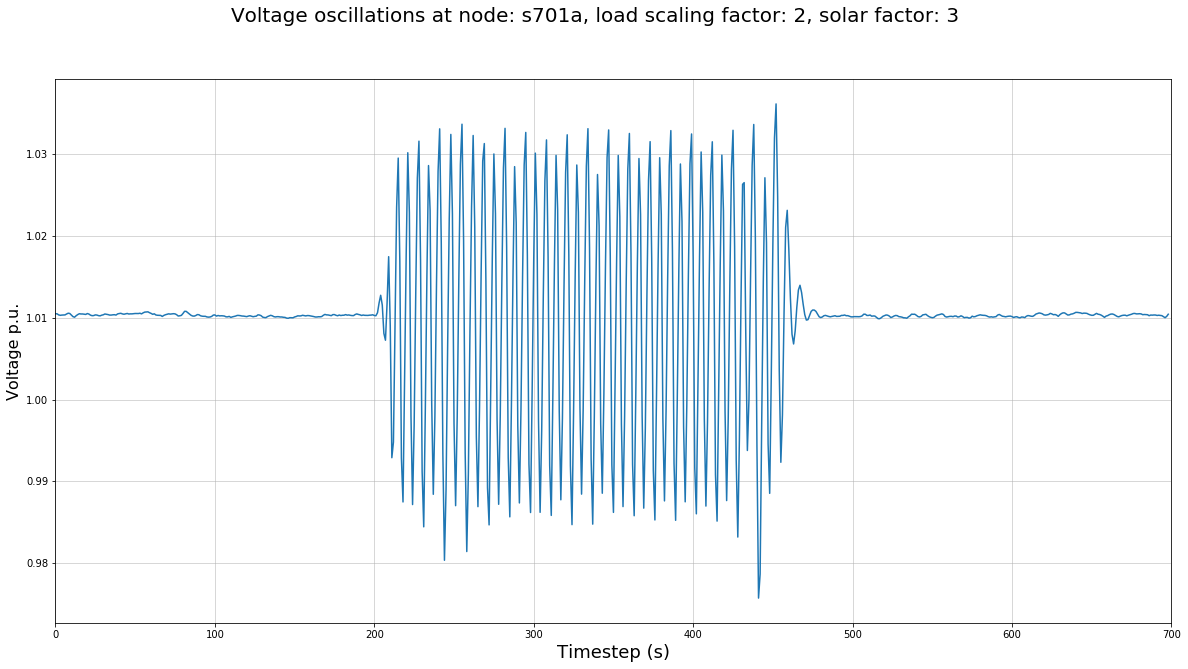

In [6]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
node_id = 's701a'
f.suptitle('Voltage oscillations at node: {}, load scaling factor: {}, solar factor: {}'.format(node_id, 2, 3), fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)
ax.plot(Logger.log_dict[node_id]['voltage'])
plt.show()

In [7]:
env.k.kernel_api.get_node_voltage('load_3051')

0.9862355496394238

In [8]:
import opendssdirect as dss 

dss.Loads.Name('load_3051')
voltage = dss.CktElement.VoltagesMagAng()

In [9]:
voltage

[117.920383746682,
 -30.400932240429213,
 118.844040464179,
 -150.47584134820542,
 118.54327247200769,
 89.64409599257552,
 0.0,
 0.0]

In [10]:
(voltage[0] + voltage[2] + voltage[4]) / (dss.CktElement.NumPhases() * (dss.Loads.kV() * 1000 / (3**0.5)))

0.9862355496394238

In [8]:
import numpy as np
def get_translation_and_slope(a_val):
    points = np.array(a_val)
    slope = points[:, 1] - points[:, 0]
    og_point = points[0, 2]
    translation = points[:, 2]
    return translation, slope

In [9]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
f.suptitle('Value of breakpoint 2 of all hacked inverters'.format(node_id), fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)

for idv in Logger.log_dict.keys():
    if 'adversary_' in idv:
        translation, slope = get_translation_and_slope(Logger.log_dict[idv]['control_setting'])
        ax.plot(translation)
plt.show()

In [11]:
Logger.log_dict['adversary_inverter_load_3051']['p_out']

dict_keys(['y', 'u', 'p_set', 'q_set', 'p_out', 'q_out', 'control_setting', 'sbar_solarirr', 'sbar_pset', 'solar_irr', 'node'])


In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for idv in Logger.log_dict.keys():
    if 'adversary_' in idv:
        translation = Logger.log_dict[idv]['q_out']
        plt.plot(translation)
plt.show()

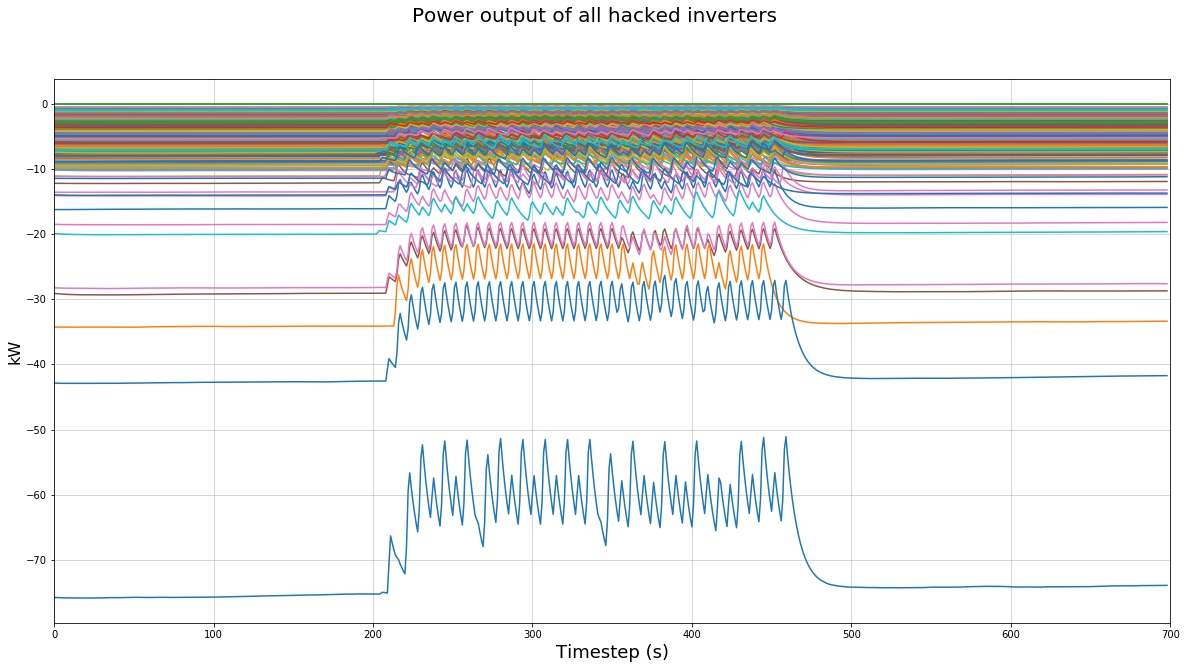

In [11]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
f.suptitle('Power output of all hacked inverters'.format(node_id), fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('kW', fontsize=16)

for idv in Logger.log_dict.keys():
    if 'adversary_' in idv:
        translation = Logger.log_dict[idv]['p_out']
        ax.plot(translation)
plt.show()

In [12]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
f.suptitle('Reactive power output of all hacked inverters'.format(node_id), fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('kVar', fontsize=16)

for idv in Logger.log_dict.keys():
    if 'adversary_' in idv:
        translation = Logger.log_dict[idv]['q_out']
        ax.plot(translation)
plt.show()

In [19]:
import numpy as np

import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
f.suptitle('Substation active power', fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('kVar', fontsize=16)
ax.plot(np.array(Logger.log_dict['network']['substation_power'])[:, 0])
plt.show()

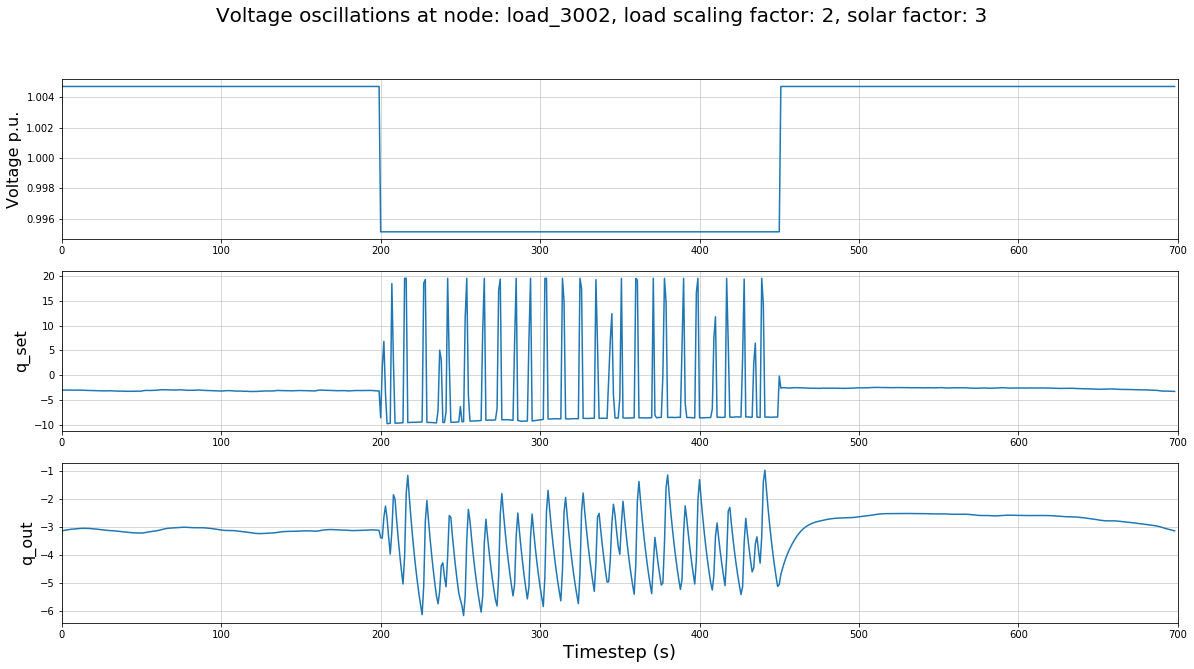

In [39]:
import numpy as np
def get_translation_and_slope(a_val):
    points = np.array(a_val)
    slope = points[:, 1] - points[:, 0]
    og_point = points[0, 2]
    translation = points[:, 2]
    return translation, slope

import matplotlib.pyplot as plt 
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))



for node_id in Logger.log_dict.keys():
    if 'load_' in node_id and 'inverter_' not in node_id:
        ax[0].grid(linestyle='-', linewidth=0.5)
        ax[0].set_xlim([0, 700])
        f.suptitle('Voltage oscillations at node: {}, load scaling factor: {}, solar factor: {}'.format(node_id, 2, 3), fontsize=20)
        #f.suptitle('Voltage oscillations at all nodes, load scaling factor: {}, solar factor: {}'.format(2, 3), fontsize=20)
        
        plt.xlabel('Timestep (s)', fontsize=18)
        ax[0].set_ylabel('Voltage p.u.', fontsize=16)
        translation, slope = get_translation_and_slope(Logger.log_dict['adversary_inverter_' + node_id]['control_setting'])
        ax[0].plot(translation)

        ax[1].grid(linestyle='-', linewidth=0.5)
        ax[1].set_xlim([0, 700])
        ax[1].set_ylabel('q_set', fontsize=16)
        translation = Logger.log_dict['adversary_inverter_' + node_id]['q_set']
        ax[1].plot(translation)

        ax[2].grid(linestyle='-', linewidth=0.5)
        ax[2].set_xlim([0, 700])
        ax[2].set_ylabel('q_out', fontsize=16)
        translation = Logger.log_dict['adversary_inverter_' + node_id]['q_out']
        ax[2].plot(translation)

plt.show()

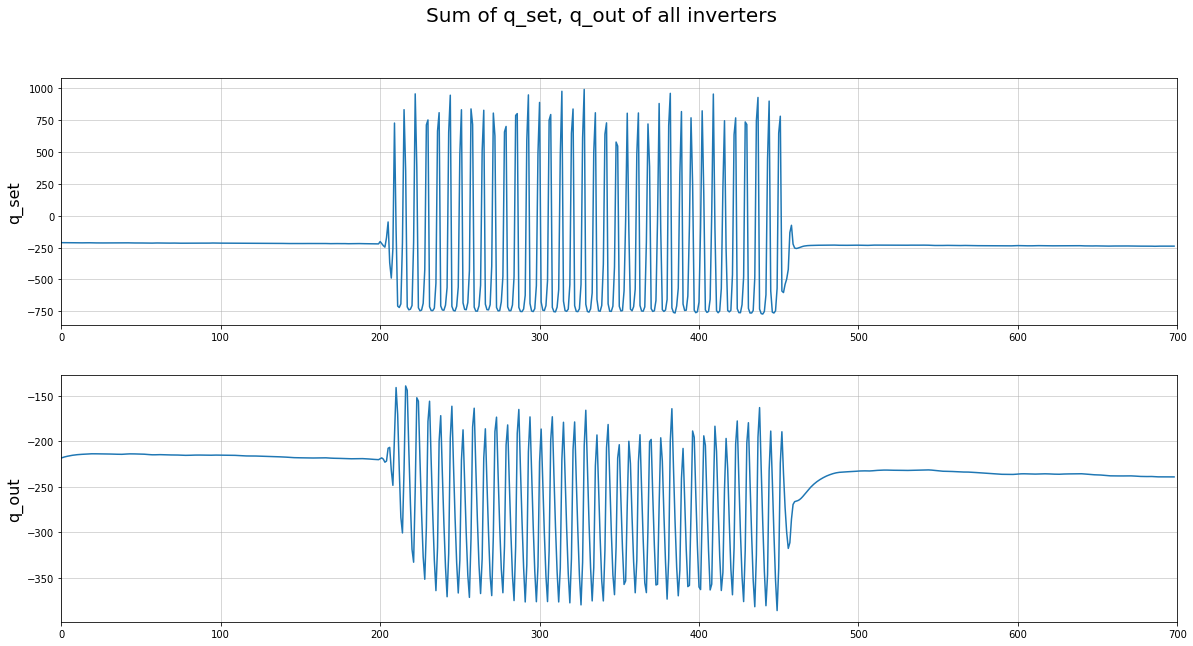

In [18]:
import numpy as np
def get_translation_and_slope(a_val):
    points = np.array(a_val)
    slope = points[:, 1] - points[:, 0]
    og_point = points[0, 2]
    translation = points[:, 2]
    return translation, slope

import matplotlib.pyplot as plt 
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))



q_set = 0
q_out = 0
for node_id in Logger.log_dict.keys():
    if 'load_' in node_id and 'inverter_' not in node_id:
        q_set += np.array(Logger.log_dict['adversary_inverter_' + node_id]['q_set']) + np.array(Logger.log_dict['inverter_' + node_id]['q_set'])
        q_out += np.array(Logger.log_dict['adversary_inverter_' + node_id]['q_out']) + np.array(Logger.log_dict['inverter_' + node_id]['q_out'])

f.suptitle('Sum of q_set, q_out of all inverters', fontsize=20)
#f.suptitle('Voltage oscillations at all nodes, load scaling factor: {}, solar factor: {}'.format(2, 3), fontsize=20)

ax[0].grid(linestyle='-', linewidth=0.5)
ax[0].set_xlim([0, 700])
ax[0].set_ylabel('q_set', fontsize=16)
translation = q_set
ax[0].plot(translation)

ax[1].grid(linestyle='-', linewidth=0.5)
ax[1].set_xlim([0, 700])
ax[1].set_ylabel('q_out', fontsize=16)
translation = q_out
ax[1].plot(translation)

plt.show()